# 新型冠状病毒数据分析演示

丁香园实时网站：https://ncov.dxy.cn/ncovh5/view/pneumonia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils   # some convenient functions
import matplotlib.font_manager as mfm
font_path = './STFANGSO.TTF'
font_prop = mfm.FontProperties(fname=font_path)

%load_ext autoreload
%autoreload 2

## 1. 获取原始数据

In [2]:
data = utils.load_chinese_data()
data.head(3)

,provinceName,cityName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,updateDate
0,湖北省,武汉,16678,0,538,479,8351,0,374,362,2020-02-06 00:43:03.849,2020-02-06
1,湖北省,黄冈,16678,0,538,479,1645,0,52,25,2020-02-06 00:43:03.849,2020-02-06
2,湖北省,孝感,16678,0,538,479,1462,0,7,18,2020-02-06 00:43:03.849,2020-02-06


### 查看简要信息

In [3]:
print('最近更新于: ', data['updateTime'].max())
print('数据日期范围: ', data['updateDate'].min(), 'to', data['updateDate'].max())
print('数据条目数: ', data.shape[0])

最近更新于:  2020-02-06 00:43:03.849000
数据日期范围:  2020-01-24 to 2020-02-06
数据条目数:  18560


## 2. 把实时数据整合成每日数据

In [4]:
daily_frm = utils.aggDaily(data)

In [5]:
daily_frm.tail(3)

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate
443,黑龙江省,鹤岗,2,0,0,2020-02-05 20:04:57.566,2020-02-05
444,黑龙江省,黑河,1,0,0,2020-02-05 20:04:57.566,2020-02-05
435,黑龙江省,齐齐哈尔,20,0,0,2020-02-05 20:04:57.566,2020-02-05


## 3. 数据查看方式

### 3.1 提取部分信息

#### 所有广东省数据

In [6]:
daily_frm[daily_frm['provinceName'] == '广东省'].head()

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate
17581,广东省,中山,2,0,0,2020-01-24 23:35:03.158,2020-01-24
17575,广东省,佛山,7,0,0,2020-01-24 23:35:03.158,2020-01-24
17576,广东省,广州,7,0,0,2020-01-24 23:35:03.158,2020-01-24
17577,广东省,惠州,5,0,0,2020-01-24 23:35:03.158,2020-01-24
17573,广东省,深圳,15,2,0,2020-01-24 23:35:03.158,2020-01-24


#### 所有武汉市数据

In [7]:
daily_frm[daily_frm['cityName'] == '武汉'].head()

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate
17772,湖北省,武汉,495,31,23,2020-01-24 17:30:09.978,2020-01-24
16597,湖北省,武汉,572,32,38,2020-01-25 23:55:35.775,2020-01-25
15948,湖北省,武汉,618,40,45,2020-01-26 13:50:35.848,2020-01-26
14769,湖北省,武汉,698,42,63,2020-01-27 16:42:57.343,2020-01-27
13965,湖北省,武汉,1590,47,85,2020-01-28 16:36:17.441,2020-01-28


#### 所有1月27日数据

In [8]:
daily_frm[daily_frm['updateDate'] == pd.to_datetime('2020-01-27')].head()

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate
14806,上海市,嘉定区,1,0,0,2020-01-27 15:56:40.534,2020-01-27
14796,上海市,外地来沪人员,23,3,0,2020-01-27 15:56:40.534,2020-01-27
14807,上海市,奉贤区,1,0,0,2020-01-27 15:56:40.534,2020-01-27
14805,上海市,宝山区,1,0,0,2020-01-27 15:56:40.534,2020-01-27
14800,上海市,徐汇区,3,0,0,2020-01-27 15:56:40.534,2020-01-27


### 3.2 时序比较图

#### 全国确诊、死亡、治愈时间序列

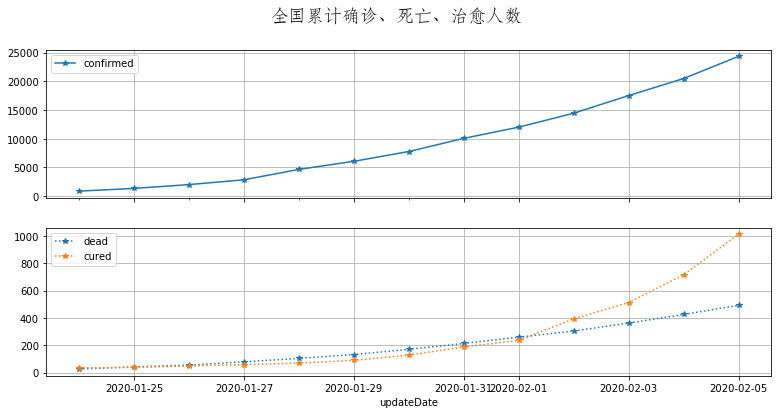

In [9]:
fig = utils.tsplot_conf_dead_cured(daily_frm, title_prefix='全国')
plt.show()

#### 单个省份的时间序列也很容易

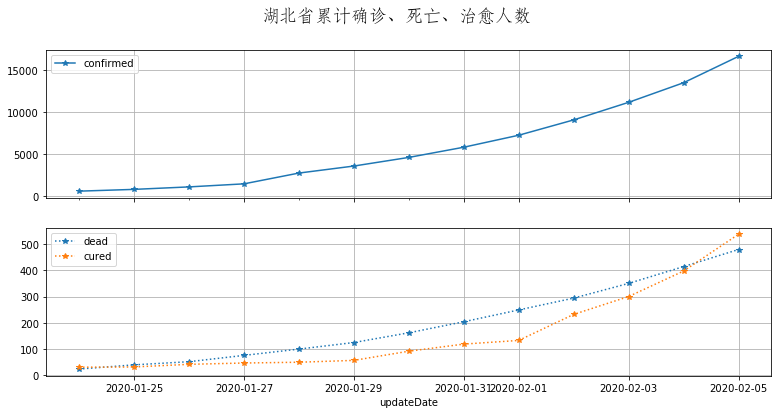

In [10]:
province = '湖北省'   # 输入你所要的省份
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['provinceName'] == province], title_prefix=province)
plt.show()                                  

#### 单个城市用法也是一样的, 还可以使用 logy=True 画指数图，看人数是否指数增长

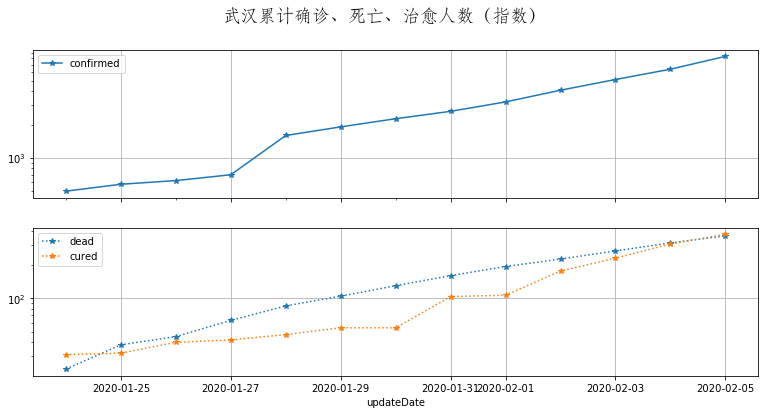

In [11]:
city = '武汉'
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['cityName'] == city], title_prefix=city, logy=True)
plt.show()  

### 3.2 Cross sectional 横向比较图

#### 各省份在2月三号确诊数比较

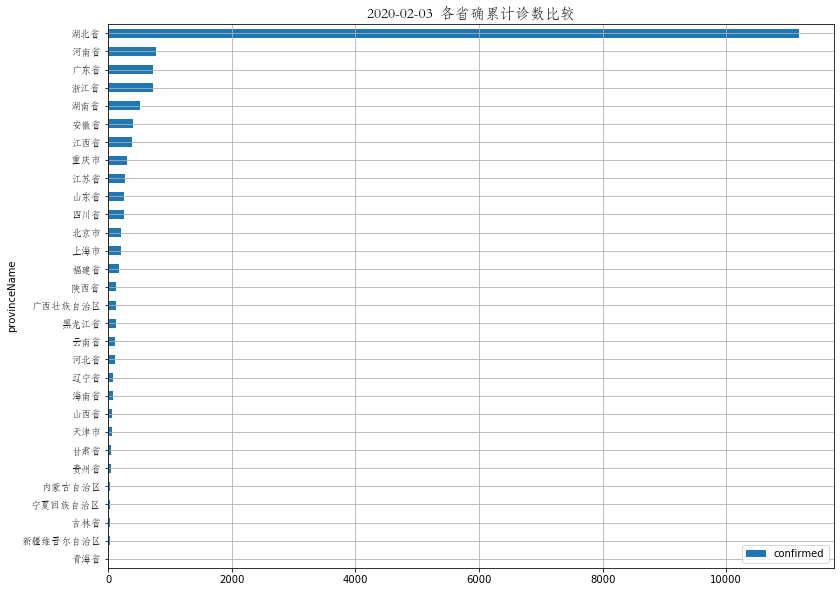

In [12]:
utils.crossectional_bar(daily_frm, '2020-02-03', col='confirmed', groupby='provinceName', title='各省确累计诊数比较')

#### 湖北省各地2月1号死亡数比较

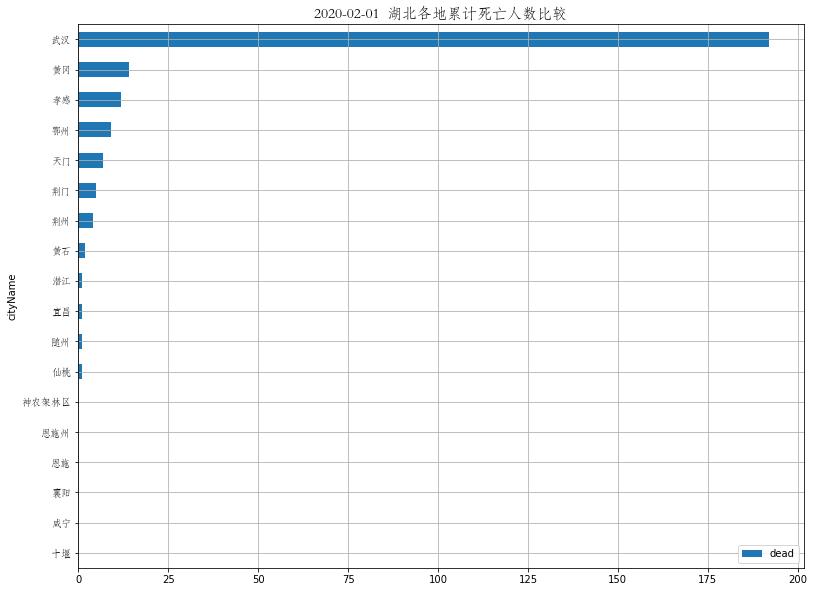

In [13]:
utils.crossectional_bar(daily_frm[daily_frm['provinceName'] == '湖北省'], '2020-02-01', col='dead', 
                        groupby='cityName', title='湖北各地累计死亡人数比较')